In [18]:
#Importing read-sm-files.py
import ReadSMFIles
from Resource import Resource
from Task import Task
from Schedule import Schedule
import random
from typing import List, Tuple, Callable
from typing import Callable, Optional
import numpy as np
import matplotlib.pyplot as plt

#reading j30.sm/j301_1.sm file
sm_file = ReadSMFIles.SMFileParser.parse_sm_file("j60.sm/j601_1.sm")

print(sm_file)


(   renewable  nonrenewable  doubly_constrained
0          4             0                   0, {'pronr': 1, 'jobs': 60, 'rel_date': 0, 'duedate': 77, 'tardcost': 50, 'MPM_Time': 77},     jobnr  modes  successors_count   successors
0       1      1                 3    [2, 3, 4]
1       2      1                 3  [5, 10, 15]
2       3      1                 3  [7, 14, 29]
3       4      1                 3  [8, 12, 16]
4       5      1                 3  [6, 22, 24]
..    ...    ...               ...          ...
57     58      1                 1         [59]
58     59      1                 1         [62]
59     60      1                 1         [62]
60     61      1                 1         [62]
61     62      1                 0           []

[62 rows x 4 columns],     jobnr  mode  duration      resources
0       1     1         0   [0, 0, 0, 0]
1       2     1         8  [10, 0, 0, 0]
2       3     1         1   [0, 1, 0, 0]
3       4     1        10   [0, 9, 0, 0]
4       5  

In [19]:
#Creating resources
r1 = int(sm_file[4].R1[0])
r2 = int(sm_file[4].R2[0])
r3 = int(sm_file[4].R3[0])
r4 = int(sm_file[4].R4[0])

R1 = Resource('R1', r1)
R2 = Resource('R2', r2)
R3 = Resource('R3', r3)
R4 = Resource('R4', r4)

resources = [R1, R2, R3, R4]

print([resource.name for resource in resources], [resource.per_period_availability for resource in resources])


['R1', 'R2', 'R3', 'R4'] [13, 11, 12, 13]


In [20]:
#Creating jobs
jobs_enumerate = sm_file[3].jobnr
jobs_duration = sm_file[3].duration
jobs_resources = sm_file[3].resources
jobs_successors = sm_file[2].successors

jobs = [None for _ in jobs_enumerate]


for i in jobs_enumerate:
    jobs[i - 1] = Task(str(i), jobs_duration[i - 1])

for i in range(len(resources)):
    for j in range(len(jobs)):
        jobs[j].add_renewable_resource(resources[i], jobs_resources[j][i])

for i in range(len(jobs)):
    successors = jobs_successors[i]
    for j in successors:
        jobs[i].add_sucessor(jobs[j - 1])
    


# jobs = jobs[1:-1]

for job in jobs:
    print(job.name, [sucessor.name for sucessor in job.predecessors])

    

    



1 []
2 ['1']
3 ['1']
4 ['1']
5 ['2']
6 ['5']
7 ['3']
8 ['4']
9 ['8']
10 ['2']
11 ['10']
12 ['4']
13 ['9']
14 ['3']
15 ['2']
16 ['4']
17 ['6']
18 ['13', '14']
19 ['14']
20 ['8']
21 ['12']
22 ['5']
23 ['7']
24 ['5']
25 ['15']
26 ['11']
27 ['12', '20']
28 ['18', '19']
29 ['3']
30 ['27']
31 ['20', '22']
32 ['17']
33 ['18']
34 ['14']
35 ['9']
36 ['35']
37 ['11']
38 ['6']
39 ['21', '33', '35']
40 ['8', '25']
41 ['29']
42 ['36']
43 ['17', '31']
44 ['11', '34']
45 ['10']
46 ['41']
47 ['28']
48 ['24', '42']
49 ['26']
50 ['38', '44']
51 ['23', '27', '43']
52 ['47']
53 ['39', '40', '45']
54 ['26', '52']
55 ['16', '48', '54']
56 ['30', '46', '53']
57 ['29', '32', '55']
58 ['16', '37', '43']
59 ['15', '57', '58']
60 ['38', '49', '51']
61 ['28', '50', '56']
62 ['59', '60', '61']



Genetic Algorithm



In [21]:
#Genetic Algorithm

#Creating random population
def create_population(population_size, jobs, resources: List[Resource]):
    population = []
    for i in range(population_size):
        schedule = Schedule()
        schedule.add_renewable_resources(resources)
        copy = jobs.copy()
        random.shuffle(copy)
        schedule.add_tasks(copy)
        population.append(schedule)
    
    return population

def create_population_with_valid_individuals(population_size: int, jobs: List[Task], resources: List[Resource]) -> List[Schedule]:
    population = []
    for _ in range(population_size):
        schedule = Schedule()
        schedule.add_renewable_resources(resources)
        _jobs = jobs.copy()
        while len(_jobs) > 0:
            job = random.choice(_jobs)
            schedule.add_task(job)
            if schedule.is_valid_precedence_relations_constraint():
                _jobs.remove(job)
            else:
                schedule.remove_task(job)
        population.append(schedule)
    return population


population = create_population(10, jobs, resources)
# population = create_population_with_valid_individuals(1, jobs, resources)
print('----------------------------------------------------------------------------------------------------')
for individual in population:
    print([task.name for task in individual.tasks], individual.makespan(2), individual.is_valid_precedence_relations_constraint(), individual.count_precedence_relations_violations())


----------------------------------------------------------------------------------------------------
['Dummy Source', '16', '17', '18', '6', '37', '1', '57', '9', '4', '30', '22', '23', '7', '39', '28', '25', '49', '59', '40', '51', '47', '31', '10', '46', '32', '62', '8', '50', '20', '27', '48', '33', '21', '54', '41', '45', '36', '44', '5', '26', '2', '14', '53', '3', '35', '11', '58', '52', '19', '38', '61', '42', '55', '29', '34', '60', '43', '13', '12', '24', '15', '56', 'Dummy Sink'] 4482 False 47
['Dummy Source', '24', '53', '60', '34', '59', '7', '45', '38', '31', '26', '47', '42', '44', '9', '41', '21', '35', '49', '23', '13', '16', '25', '57', '12', '58', '32', '51', '11', '6', '50', '46', '37', '20', '22', '54', '28', '14', '27', '55', '36', '18', '43', '17', '61', '52', '1', '2', '4', '40', '3', '56', '5', '8', '39', '33', '19', '62', '15', '10', '30', '48', '29', 'Dummy Sink'] 4684 False 48
['Dummy Source', '2', '4', '45', '13', '57', '40', '28', '58', '25', '3', '23', '21

Crossover

In [22]:

class OnePointCrossoverOperator:
    def __init__(self, crossover_rate: float = 0.8):
        self.crossover_rate = crossover_rate

    def __call__(
            self, parent1: Schedule, parent2: Schedule
    ) -> Tuple[Schedule, Schedule]:
        if random.random() > self.crossover_rate:
            return parent1, parent2
        n = len(parent1.tasks)
        crossover_point = random.randint(1, n - 3)

        child1 = Schedule()
        child2 = Schedule()

        parent1_tasks = parent1.tasks.copy()[1:-1]
        parent2_tasks = parent2.tasks.copy()[1:-1]

        child1.add_tasks(parent1_tasks[:crossover_point])
        for task in parent2.tasks:
            if task not in child1.tasks and task.name != 'Dummy Source' and task.name != 'Dummy Sink':
                child1.add_task(task)
        
        child2.add_tasks(parent2_tasks[:crossover_point])
        for task in parent1.tasks:
            if task not in child2.tasks and task.name != 'Dummy Source' and task.name != 'Dummy Sink':
                child2.add_task(task)

        return child1, child2


crossover = OnePointCrossoverOperator()

offspring = []
for i in range(0, len(population)):
    parent1 = random.choice(population)
    parent2 = random.choice(population)
    child1, child2 = crossover(parent1, parent2)
    offspring.append(child1)


#PRINTING TIME INTERVALS
for task in child1.tasks:
    print(task.earliest_start, task.earliest_finish, task.duration)




0 0 0
27 28 1
37 40 3
64 74 10
14 19 5
30 31 1
0 0 0
71 77 6
46 47 1
17 27 10
59 63 4
27 33 6
16 19 3
8 16 8
83 87 4
27 36 9
13 20 7
34 36 2
38 46 8
1 3 2
17 25 8
8 17 9
1 9 8
36 45 9
47 53 6
8 13 5
46 56 10
31 32 1
28 34 6
73 83 10
33 36 3
46 49 3
3 4 1
0 1 1
19 21 2
67 71 4
0 8 8
73 81 8
27 30 3
47 56 9
30 33 3
25 28 3
36 37 1
49 59 10
8 14 6
40 43 3
36 43 7
47 50 3
19 25 6
36 40 4
50 50 0
9 19 10
36 37 1
59 63 4
16 25 9
14 17 3
25 31 6
67 76 9
33 43 10
77 83 6
27 36 9
64 74 10
34 36 2
0 0 0


Parent Selection

In [23]:
class TournamentSelector:
    def __init__(self, tournament_size: int = 3):
        self.tournament_size = tournament_size

    def __call__(self, population: List[Schedule], fitness: List[int] = []) -> List[Schedule]:
        sample_indexes = random.sample(range(len(population)), self.tournament_size)
        sample_fitness = [fitness[i] for i in sample_indexes]
        min_fit_index = sample_indexes[
            sample_fitness.index(min(sample_fitness))
        ]
        return population[min_fit_index]

selector = TournamentSelector(tournament_size=3)

selected = selector(population, [individual.makespan(2) for individual in population])

print(selected.is_valid_precedence_relations_constraint(), selected.tasks, selected.makespan(2))

False [<Task.Task object at 0x1096ffd00> <Task.Task object at 0x1096e6340>
 <Task.Task object at 0x1096f6c70> <Task.Task object at 0x1078db820>
 <Task.Task object at 0x10790e850> <Task.Task object at 0x1096f6160>
 <Task.Task object at 0x1096f6e80> <Task.Task object at 0x10790e190>
 <Task.Task object at 0x1096f69d0> <Task.Task object at 0x1078db0a0>
 <Task.Task object at 0x1096577f0> <Task.Task object at 0x1096f68e0>
 <Task.Task object at 0x1078dbb20> <Task.Task object at 0x1096f60d0>
 <Task.Task object at 0x1096f6be0> <Task.Task object at 0x1096f6b80>
 <Task.Task object at 0x1096e6070> <Task.Task object at 0x1096e61c0>
 <Task.Task object at 0x1094fa8e0> <Task.Task object at 0x10790ea00>
 <Task.Task object at 0x1096f63a0> <Task.Task object at 0x1078db3a0>
 <Task.Task object at 0x1078db970> <Task.Task object at 0x1096f6760>
 <Task.Task object at 0x1096f6520> <Task.Task object at 0x1078dbfd0>
 <Task.Task object at 0x1078db2e0> <Task.Task object at 0x1096f6910>
 <Task.Task object at 0x1078

In [24]:
class SwapMutationOperator:
    def __init__(self, mutation_rate: float = 0.2):
        self.mutation_rate = mutation_rate

    def __call__(self, individual: Schedule) -> Schedule:
        if random.random() > self.mutation_rate:
            return individual

        n = len(individual.tasks)
        i, j = random.sample(range(1, n - 1), 2)
        individual.tasks[i], individual.tasks[j] = individual.tasks[j], individual.tasks[i]
        return individual

print([task.name for task in population[0].tasks], individual.makespan(2))
mutator = SwapMutationOperator()
population2 = population.copy()
individual = population2[0]
mutated_individual = mutator(individual)

print([task.name for task in mutated_individual.tasks], mutated_individual.makespan(2))

['Dummy Source', '16', '17', '18', '6', '37', '1', '57', '9', '4', '30', '22', '23', '7', '39', '28', '25', '49', '59', '40', '51', '47', '31', '10', '46', '32', '62', '8', '50', '20', '27', '48', '33', '21', '54', '41', '45', '36', '44', '5', '26', '2', '14', '53', '3', '35', '11', '58', '52', '19', '38', '61', '42', '55', '29', '34', '60', '43', '13', '12', '24', '15', '56', 'Dummy Sink'] 3135
['Dummy Source', '16', '17', '18', '6', '37', '1', '57', '9', '4', '30', '22', '23', '7', '39', '28', '25', '49', '59', '40', '51', '47', '31', '10', '46', '32', '62', '8', '50', '20', '27', '48', '33', '21', '54', '41', '45', '36', '44', '5', '26', '2', '14', '53', '3', '35', '11', '58', '52', '19', '38', '61', '42', '55', '29', '34', '60', '43', '13', '12', '24', '15', '56', 'Dummy Sink'] 4510


Next Generation Producer

In [27]:
class NextGenerationProducer:
    def __init__(
        self,
        selector: Callable[[np.ndarray, np.ndarray], np.ndarray],
        survivor_selector: Callable[[np.ndarray, np.ndarray], np.ndarray],
        crossover_op: Callable[[np.ndarray, np.ndarray], np.ndarray],
        mutator: Callable[[np.ndarray], np.ndarray],
        best_individual_mutator: Optional[Callable[[np.ndarray], np.ndarray]] = None,
        preserve_best: bool = True,
        mutate_best: bool = True,
        penalization_alpha:float = 1.0
    ) -> None:
        self.selector = selector
        self.survivor_selector = survivor_selector
        self.crossover_op = crossover_op
        self.mutator = mutator
        self.preserve_best = preserve_best
        self.mutate_best = mutate_best
        self.penalization_alpha = penalization_alpha

        if best_individual_mutator is None:
            self.best_individual_mutator = mutator
        else:
            self.best_individual_mutator = best_individual_mutator

    def __call__(
        self, population: np.ndarray, fitness: np.ndarray
    ) -> np.ndarray:
        target_size = len(population)
        if self.preserve_best:
            target_size -= 1
        if self.mutate_best:
            target_size -= 1

        next_gen_candidates = [0 for _ in range(target_size)]
        next_gen_candidates_fitness = [0 for _ in range(target_size)]
        for i in range(0, target_size):
            # Select two parents
            parent1 = self.selector(population, fitness)
            parent2 = self.selector(population, fitness)

            # Combine parents to generate new individual
            new_ind = self.crossover_op(parent1, parent2)

            # Mutate new individual and add it to the next generation
            k = random.random()
            if k < 0.5:
                mutated_new_ind = self.mutator(new_ind[0])
                next_gen_candidates[i] = mutated_new_ind
            else:
                mutated_new_ind = self.mutator(new_ind[1])
                next_gen_candidates[i] = mutated_new_ind

            #Add new individual fitness to the fitness array
            next_gen_candidates_fitness[i] = mutated_new_ind.makespan(self.penalization_alpha)
        
        next_gen_candidates = np.append(population, next_gen_candidates, axis=0)
        next_gen_candidates_fitness = np.append(fitness, next_gen_candidates_fitness, axis=0)

        #Selecting survivors using tournament
        next_gen = np.zeros_like(population)
        for i in range(len(population)):
            next_gen[i] = self.survivor_selector(next_gen_candidates, next_gen_candidates_fitness)

        if self.preserve_best or self.mutate_best:
            best_fitness_index = np.argmin(fitness)
            best_individual = population[best_fitness_index]

            ind = -1

            if self.preserve_best:
                next_gen[ind] = best_individual
                ind -= 1

            if self.mutate_best:
                next_gen[ind] = self.best_individual_mutator(best_individual)

        return next_gen

nextGenProducer = NextGenerationProducer(
    TournamentSelector(tournament_size=3), 
    OnePointCrossoverOperator(crossover_rate=0.8), 
    SwapMutationOperator(mutation_rate=0.2),
    SwapMutationOperator(mutation_rate=0.2),
    True,
    True
)

# fitness = [individual.makespan() for individual in population]
#
# nextGen = nextGenProducer(population=population, fitness=fitness)

# for individual in nextGen:
#     print(individual.makespan(), [task.name for task in individual.tasks])



Genetic Algorithm

In [28]:
class GeneticAlgorithm:
    def __init__(
        self,
        next_gen_prod: NextGenerationProducer,
        *,
        opt_value: Optional[np.ndarray] = None,
        max_generations: int = 1000,
        min_improvement_threshold: float = 1e-3,
        max_gens_without_min_improvement: Optional[int] = 100,
        mean_improvement_threshold: float = 1e-3,
        max_gens_without_mean_improvement: Optional[int] = 100,
        min_pop_diversity_std_dev: Optional[float] = None,
        precision: float = 1e-6,
    ) -> None:
        self.next_gen_prod = next_gen_prod
        self.max_gens = max_generations
        self.opt_value = opt_value
        self.min_improvement_threshold = min_improvement_threshold
        self.max_gens_without_min_improvement = max_gens_without_min_improvement
        self.mean_improvement_threshold = mean_improvement_threshold
        self.max_gens_without_mean_improvement = max_gens_without_mean_improvement
        self.min_pop_diversity_std_dev = min_pop_diversity_std_dev
        self.precision = precision

        self.gen_fitness_history = []

    def _step(
        self, population: np.ndarray, fitness=np.ndarray
    ) -> tuple[np.ndarray, np.ndarray]:
        next_gen = self.next_gen_prod(population, fitness)
        next_gen_fitness = [individual.makespan(self.next_gen_prod.penalization_alpha) for individual in next_gen]

        return next_gen, next_gen_fitness

    def _compute_gen_fit_history(
        self, population: np.ndarray, fitness: np.ndarray
    ) -> None:
        self.gen_fitness_history.append(
            {
                "mean": np.mean(fitness),
                "min": np.min(fitness),
                "max": np.max(fitness),
                "std_dev": np.std(fitness),
                "best_individual": population[np.argmin(fitness)],
            }
        )

    def execute(
        self, initial_population: np.ndarray, verbosity: int = 0
    ) -> None:
        prev_gen = initial_population
        prev_gen_fitness = [individual.makespan(self.next_gen_prod.penalization_alpha) for individual in initial_population]

        self._compute_gen_fit_history(prev_gen, prev_gen_fitness)

        # Initialize data for the loop
        gens_without_mean_improvement = 0
        gens_without_min_improvement = 0
        best_mean = self.gen_fitness_history[-1]["mean"]
        best_min = self.gen_fitness_history[-1]["min"]
        self.gen_fitness_history.clear()

        for gen_index in range(self.max_gens):
            stop = False

            # Evolve population
            next_gen, next_gen_fitness = self._step(prev_gen, prev_gen_fitness)
            self._compute_gen_fit_history(next_gen, next_gen_fitness)
            # Check stop criteria
            # Optimal value found?
            if self.opt_value is not None:
                dist = np.min(np.linalg.norm(next_gen - self.opt_value,axis=1))
                if dist < self.precision:
                    if verbosity > 0:
                        best_individual = self.gen_fitness_history[-1]["best_individual"]
                        print(
                            f"Stopping at iteration {gen_index} because a individual ({best_individual}) close enough to the optimal value ({self.opt_value}) was found."
                        )
                    stop = True

            # Mean improvement
            if self.max_gens_without_mean_improvement is not None:
                if best_mean - self.gen_fitness_history[-1]["mean"] > self.mean_improvement_threshold:
                    best_mean = self.gen_fitness_history[-1]["mean"]
                    gens_without_mean_improvement = 0
                else:
                    gens_without_mean_improvement += 1

                if gens_without_mean_improvement > self.max_gens_without_mean_improvement:
                    if verbosity > 0:
                        print(
                            f"Stopping at iteration {gen_index} because too many iterations ({self.max_gens_without_mean_improvement}) were executed without providing a mean fitness improvement."
                        )
                    stop = True

            # Min improvement
            if self.max_gens_without_min_improvement is not None:
                if best_min - self.gen_fitness_history[-1]["min"] > self.min_improvement_threshold:
                    best_min = self.gen_fitness_history[-1]["min"]
                    gens_without_min_improvement = 0
                else:
                    gens_without_min_improvement += 1

                if gens_without_min_improvement > self.max_gens_without_min_improvement:
                    if verbosity > 0:
                        print(f"Stopping at iteration {gen_index} because too many iterations ({self.max_gens_without_min_improvement}) were executed without providing a minimal fitness improvement.")
                    stop = True

            # Population diversity smaller than limit?
            if self.min_pop_diversity_std_dev is not None:
                fit_std_dev = np.std(next_gen_fitness)
                if fit_std_dev < self.min_pop_diversity_std_dev:
                    if verbosity > 0:
                        print(
                            f"Stopping at iteration {gen_index} because population diversity ({fit_std_dev}) was smaller than the allowed minimum {self.min_pop_diversity_std_dev}."
                        )
                    stop = True

            # Update generation
            prev_gen = next_gen
            prev_gen_fitness = next_gen_fitness

            if verbosity > 1:
                print("Iteration", gen_index, ":", self.gen_fitness_history[-1])

            if stop:
                break

        return prev_gen[np.argmin(prev_gen_fitness)]

In [29]:
def plot_run_hist(gen_hist: list[dict]) -> None:
    fig, ax = plt.subplots()

    iterations = list(range(len(gen_hist)))
    # Average
    avg = [gen["mean"] for gen in gen_hist]
    ax.plot(iterations, avg, label="Average")

    # Max
    _max = [gen["max"] for gen in gen_hist]
    ax.plot(iterations, _max, label="Maximum")

    # Min
    _min = [gen["min"] for gen in gen_hist]
    ax.plot(iterations, _min, label="Minimum")

    ax.grid(True)
    # ax.set_yscale("log")
    ax.set_xlabel("Generations")
    ax.set_ylabel("Fitness")
    ax.set_title("Minimum, Average and Maximum Fitness Across Generations")
    ax.legend(draggable=True)

In [13]:
# pop_size = 100
# use_elitism = True
# crossover_rate = 0.8
# mutation_rate = 0.3
# mutate_best = False #the best individual was being mutated and it was descarting the best individual sometimes
# max_generations = 50
# max_gens_without_min_improvement=10
# penalization_alpha = 1

# # initial_pop = create_population_with_valid_individuals(pop_size, jobs, resources)
# initial_pop = create_population(pop_size,jobs, resources)
# # initial_pop.extend(some_valid_individuals)
# initial_pop_fitness = [individual.makespan(penalization_alpha) for individual in initial_pop]

# tournament_ga = GeneticAlgorithm(
#     NextGenerationProducer(
#         TournamentSelector(tournament_size=7),
#         TournamentSelector(tournament_size=14),
#         OnePointCrossoverOperator(crossover_rate=crossover_rate),
#         SwapMutationOperator(mutation_rate=mutation_rate),
#         SwapMutationOperator(mutation_rate=mutation_rate),
#         preserve_best=use_elitism,
#         mutate_best=mutate_best,
#         penalization_alpha=penalization_alpha
#     ),
#     opt_value=None,
#     max_generations=max_generations,
#     max_gens_without_min_improvement=max_gens_without_min_improvement,
#     max_gens_without_mean_improvement=None,
#     min_pop_diversity_std_dev=None,
#     precision=1e-6,
# )

# best_individual = tournament_ga.execute(initial_pop, 2)

# print("Best Individual:", best_individual)
# print("Fitness:", best_individual.makespan(penalization_alpha), best_individual.is_valid_precedence_relations_constraint())
# print("Violations:", best_individual.count_precedence_relations_violations())
# print("Real Fitness:", best_individual.makespan_without_penalization())

# plot_run_hist(tournament_ga.gen_fitness_history)

In [30]:
def plot_run_histogram(run_hist: list[int]) -> None:
    fig, ax = plt.subplots()

    ax.hist(run_hist)
    ax.set_title(f"Histogram of the number of generations required for convergence across {len(run_hist)} runs")
    ax.set_xlabel("Generations required for convergence")
    ax.set_ylabel("Number of executions")

Iteration 0 : {'mean': np.float64(2030.36), 'min': np.int64(1609), 'max': np.int64(2584), 'std_dev': np.float64(223.97283406699125), 'best_individual': <Schedule.Schedule object at 0x109635880>}
Iteration 1 : {'mean': np.float64(1822.79), 'min': np.int64(1302), 'max': np.int64(2291), 'std_dev': np.float64(184.9043155256253), 'best_individual': <Schedule.Schedule object at 0x10961c610>}
Iteration 2 : {'mean': np.float64(1698.57), 'min': np.int64(1302), 'max': np.int64(2217), 'std_dev': np.float64(189.18494945423117), 'best_individual': <Schedule.Schedule object at 0x10961c610>}
Iteration 3 : {'mean': np.float64(1563.51), 'min': np.int64(1166), 'max': np.int64(2032), 'std_dev': np.float64(215.9750214723916), 'best_individual': <Schedule.Schedule object at 0x109602250>}
Iteration 4 : {'mean': np.float64(1363.67), 'min': np.int64(1038), 'max': np.int64(1758), 'std_dev': np.float64(148.70595515983885), 'best_individual': <Schedule.Schedule object at 0x108030190>}
Iteration 5 : {'mean': np.f

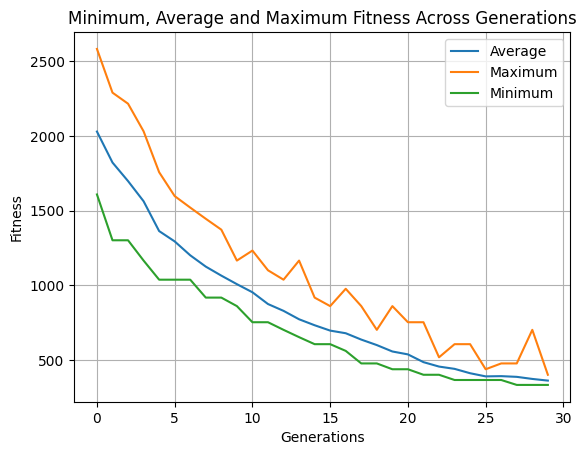

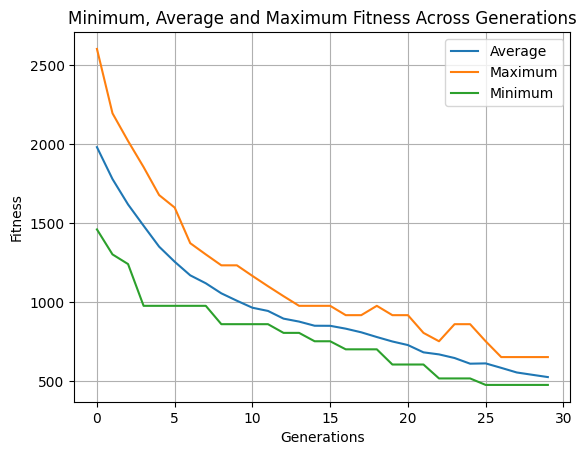

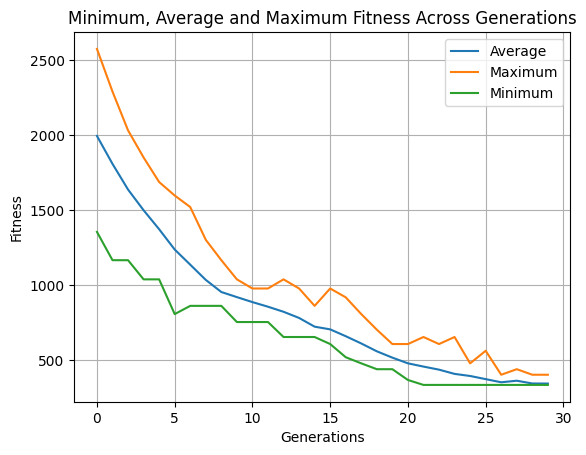

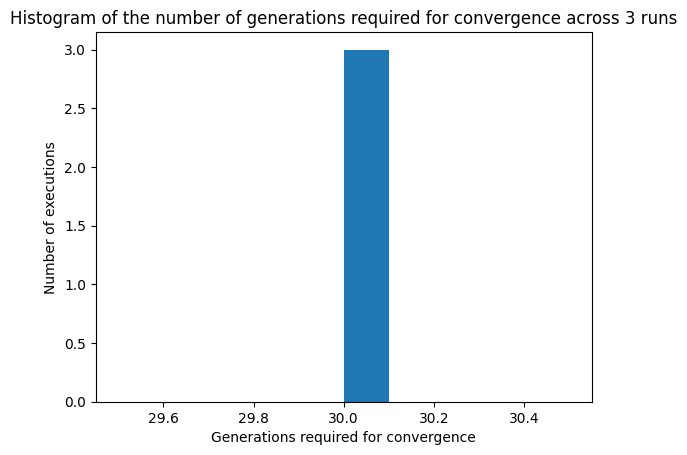

In [31]:
pop_size = 100
use_elitism = True
n_runs = 3
crossover_rate = 0.8
mutation_rate = 0.3
mutate_best = False #the best individual was being mutated and it was descarting the best individual sometimes
max_generations = 30
max_gens_without_min_improvement=7
penalization_alpha = 1

generations_per_run = []

for run_index in range(n_runs):
    # initial_pop = create_population_with_valid_individuals(pop_size, jobs, resources)
    initial_pop = create_population(pop_size,jobs, resources)
    # initial_pop.extend(some_valid_individuals)
    initial_pop_fitness = [individual.makespan(penalization_alpha) for individual in initial_pop]

    tournament_ga = GeneticAlgorithm(
        NextGenerationProducer(
            TournamentSelector(tournament_size=2),
            TournamentSelector(tournament_size=2),
            OnePointCrossoverOperator(crossover_rate=crossover_rate),
            SwapMutationOperator(mutation_rate=mutation_rate),
            SwapMutationOperator(mutation_rate=mutation_rate),
            preserve_best=use_elitism,
            mutate_best=mutate_best,
            penalization_alpha=penalization_alpha
    ),
    opt_value=None,
    max_generations=max_generations,
    max_gens_without_min_improvement=max_gens_without_min_improvement,
    max_gens_without_mean_improvement=None,
    min_pop_diversity_std_dev=None,
    precision=1e-6,
)
    


    best_individual = tournament_ga.execute(initial_pop, 2)
    generations_per_run.append(len(tournament_ga.gen_fitness_history))
    print("Best Individual:", best_individual)
    print("Fitness:", best_individual.makespan(penalization_alpha), best_individual.is_valid_precedence_relations_constraint())
    print("Violations:", best_individual.count_precedence_relations_violations())
    print("Real Fitness:", best_individual.makespan_without_penalization())
    plot_run_hist(tournament_ga.gen_fitness_history)

plot_run_histogram(generations_per_run)